In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


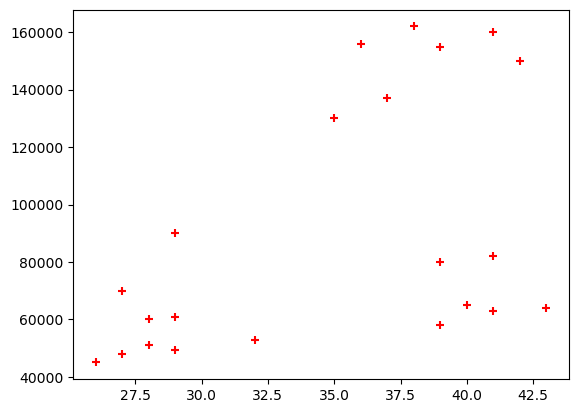

In [6]:
plt.scatter(df.Age,df['Income($)'],color = 'red',marker='+')

In [8]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [10]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\SAAD COMMUNICATION\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
df['cluter'] = y_predicted
df.head()

,Name,Age,Income($),cluter
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2


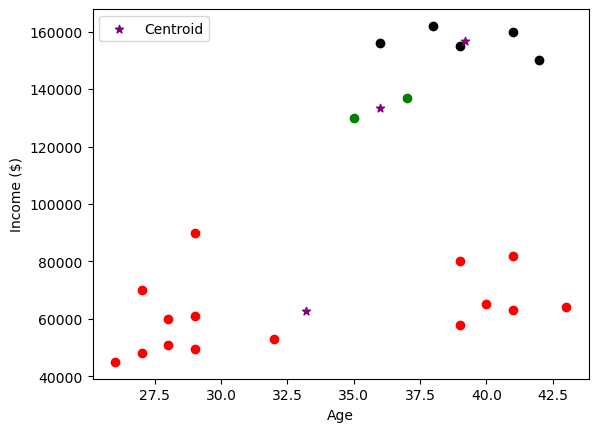

In [14]:
df0 = df[df.cluter==0]
df1 = df[df.cluter==1]
df2 = df[df.cluter==2]
plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [16]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluter
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,0


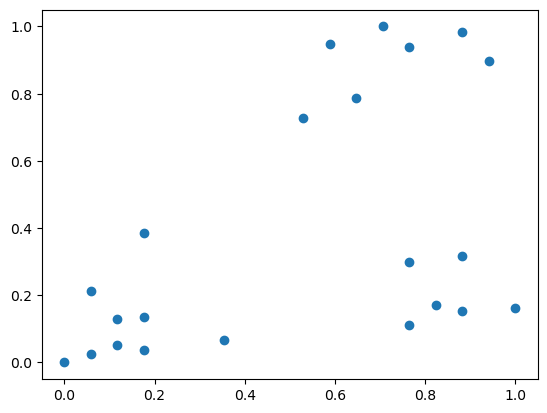

In [18]:
plt.scatter(df.Age,df['Income($)'])

In [20]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\SAAD COMMUNICATION\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [22]:
df['clusters'] = y_predicted
df.head()

,Name,Age,Income($),cluter,clusters
0,Rob,0.058824,0.213675,1,1
1,Michael,0.176471,0.384615,1,1
2,Mohan,0.176471,0.136752,1,1
3,Ismail,0.117647,0.128205,1,1
4,Kory,0.941176,0.897436,2,2


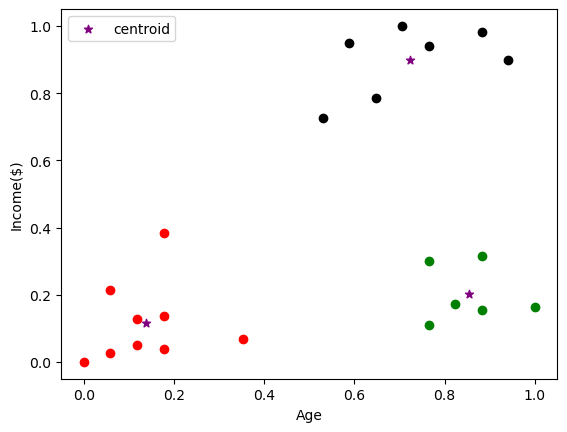

In [24]:
df0 = df[df.clusters==0]
df1 = df[df.clusters==1]
df2 = df[df.clusters==2]
plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [29]:
k_rng=range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\SAAD COMMUNICATION\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SAAD COMMUNICATION\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SAAD COMMUNICATION\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SAAD COMMUNICATION\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarn

In [31]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.368773407644059,
 0.336528430368078,
 0.21578607765873023,
 0.20497164394112316,
 0.1496440842347003,
 0.13344288192904113]

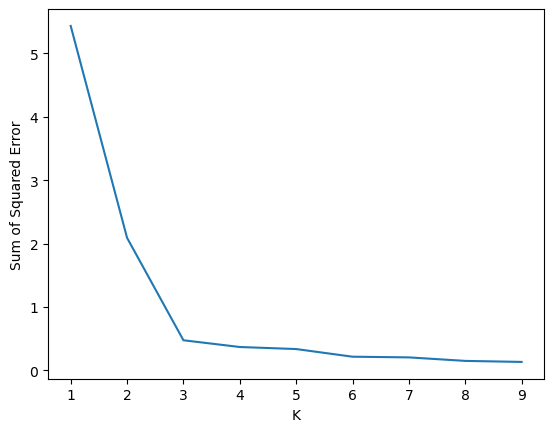

In [35]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)